In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the Data
claim = pd.read_csv('claimants.csv')

In [3]:
claim.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
# Dropping the casenum column as it is not requaired
claim.drop(['CASENUM'],inplace = True,axis = 1)

In [5]:
claim

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [6]:
claim.shape

(1340, 6)

In [7]:
# Removing NA values
claim = claim.dropna()
claim.shape

(1096, 6)

In [8]:
# Dividing Data In Input and Output
x = claim.iloc[:,1:]
y = claim.iloc[:,0]

In [9]:
# Logistic Regression and Fit the Model
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Predict for x dataset
y_pred = classifier.predict(x)

In [11]:
y_pred_df = pd.DataFrame({
    'Acctual' : y,
    'Predicted_prob' : classifier.predict(x)
})
y_pred_df

,Acctual,Predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [12]:
# Confusion Matrix for the Model Accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)

In [13]:
confusion_matrix

array([[381, 197],
       [123, 395]], dtype=int64)

In [14]:
((381+395)/(381+197+123+395))

0.708029197080292

In [15]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



Text(0, 0.5, 'True Positive Rate')

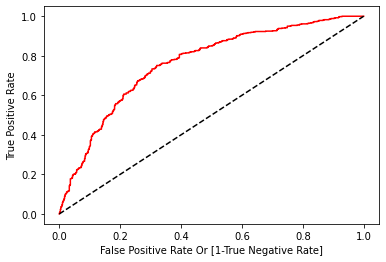

In [16]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr , tpr , thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y,y_pred)
plt.plot(fpr,tpr,color = 'red',label = 'logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate Or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')

In [17]:
auc

0.7108589063606365

In [18]:
classifier.predict_proba(x)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])